## Assignment 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)


class LogisticRegression:
    
    def __init__(self, method='mini-batch',max_iter=1000, alpha=0.001):
        self.method = method
        self.max_iter = max_iter
        self.alpha = alpha
    
    def mini_batch_GD(self,X,y):
        
        self.w = np.zeros(X.shape[1])
        
        self.loss = []
        self.iters = []
        
        batch_size = int(0.1 * X.shape[0])
        
        for i in range(self.max_iter):
            
            shuffled_index = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_index]
            y_shuffled = y[shuffled_index]
            
            for index in range(0, X.shape[0], batch_size):
                
                batch_X = X_shuffled[index : index + batch_size]
                batch_y = y_shuffled[index : index + batch_size]
                
                cost, grad = self.gradient(batch_X, batch_y, self.w)
                self.w =self. w - self.alpha * grad
                
            if i % 500 ==0:
                print(f"Cost at iteration {i}", cost)
                self.loss.append(cost)
                self.iters.append(i)
                
        return self.w, i
    
    def plot(self):
        plt.plot(self.iters, self.loss, label='Training Losses')
        plt.xlabel('num of iters')
        plt.ylabel('training loss')
        plt.title('Training loss vs number of iters')
        plt.legend()
    
    def gradient(self, X, y, w):
        m = X.shape[0]
        h = self.h_theta(X)
        error = h - y
        cost = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return cost, grad
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def h_theta(self,X):
        return self.sigmoid(X @ self.w)
    
    def output(self, pred):
        return np.round(pred)
    

In [2]:
model = LogisticRegression(max_iter=20000)
w, i = model.mini_batch_GD(X_train, y_train)

Cost at iteration 0 21.894767459063946
Cost at iteration 500 3.9802764622458784
Cost at iteration 1000 2.1526499073387844
Cost at iteration 1500 2.6833654964840115
Cost at iteration 2000 1.0833427958125292
Cost at iteration 2500 0.5268020598186669
Cost at iteration 3000 8.875495348336152
Cost at iteration 3500 1.0927125443140822
Cost at iteration 4000 9.460303204735878
Cost at iteration 4500 6.057560958389599
Cost at iteration 5000 4.7974698773654
Cost at iteration 5500 1.5059116196006843
Cost at iteration 6000 1.4736132805995585
Cost at iteration 6500 3.198262132300489
Cost at iteration 7000 5.680414473126058
Cost at iteration 7500 4.48386904920167
Cost at iteration 8000 3.2387998282770964
Cost at iteration 8500 0.9947289545766381
Cost at iteration 9000 2.0526810866832577
Cost at iteration 9500 5.435531898684679
Cost at iteration 10000 4.657202415471979
Cost at iteration 10500 3.714169372443161
Cost at iteration 11000 3.226302459069786
Cost at iteration 11500 2.4570972395260755
Cost a

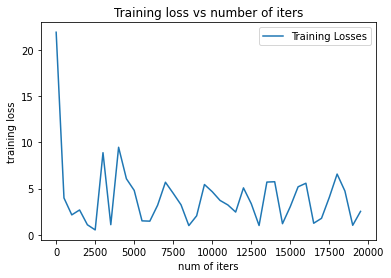

In [3]:
model.plot()

In [4]:
yhat = model.h_theta(X_test)
y_pred = model.output(yhat)
y_pred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.])

In [5]:
class classification_report:
    
    def __init__(self, actual, predict):
        self.actual = actual
        self.predict = predict
        
        self.TP = sum((self.actual == 1) & (self.predict == 1))
        self.TN = sum((self.actual == 0) & (self.predict == 0))
        self.FN = sum((self.actual == 1) & (self.predict == 0))
        self.FP = sum((self.actual == 0) & (self.predict == 1))
    
    def accuracy(self):
        self.acc = 100 * (self.TP + self.TN) / float(self.TP + self.TN + self.FP + self.FN)
        return self.acc
    
    def precision(self):
        self.pre = 100 * self.TP / float(self.TP + self.FP)
        return self.pre
    
    def recall(self):
        self.rec = 100 * self.TP / float(self.TP + self.FN)
        return self.rec
    
    def f1(self):
        self.F1 = 2 * (self.precision() * self.recall()) / (self.precision() + self.recall())
        return self.F1

In [6]:
report = classification_report(y_test, y_pred)
accuracy = report.accuracy()
recall = report.recall()
precision = report.precision()
f1 = report.f1()
print(f"accuracy: {accuracy}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

accuracy: 98.0
recall: 97.59036144578313
precision: 98.78048780487805
f1: 98.18181818181817


In [7]:
# checking wherethere it is correct or not
from sklearn.metrics import classification_report
print("Report: ", classification_report(y_test, y_pred))

Report:                precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.98        83

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

